In [2]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading the data file and storing it
EleRating=pd.read_csv('ratings_Electronics.csv', names=['userId','productId','Rating','timestamp'])

In [4]:
EleRating.head(10)
#From below data, we have nomial data-userId, productId and then categorical data-Rating where as timestamp is continuous data
#Let's analyze it further

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [5]:
EleRating.describe().transpose()
#Inference: From below data we can conclude that no negetive values are present.


,count,mean,std,min,25%,50%,75%,max
Rating,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [6]:
EleRating.info()
#The data set has 7824482 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
# Summary statistics of 'Rating' variable
EleRating['Rating'].describe().transpose()
#From below data we can inference that 'Rating' scale varies between 1-5

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [8]:
# Checking the presence of missing values.
EleRating.isnull().values.any(),EleRating.isna().values.any(),EleRating.isna().sum()
# Below data indicates that there are no null and NAN values. 

(False,
 False,
 userId       0
 productId    0
 Rating       0
 timestamp    0
 dtype: int64)

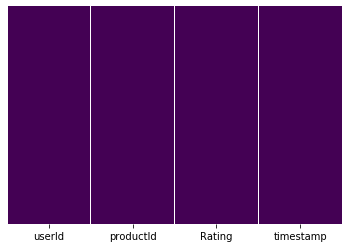

In [9]:
#Let's reconfirm the understanding with heatmap
sns.heatmap(EleRating.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#From below graph, it is evident that none of the values are missing in the given data set

In [10]:
#Droping timestamp as it is no more required for current project scope
EleRating=EleRating.drop(['timestamp'],axis=1)

In [11]:
#Proceeding with univariate analysis 

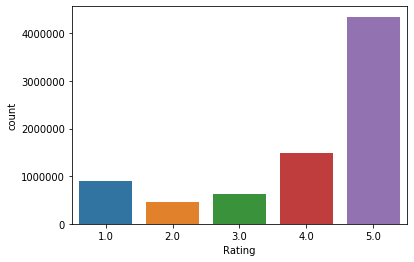

In [12]:
#Analyzing the variable-Rating 
sns.countplot(EleRating['Rating'])
#Inference: Data set has more number of items with ratings-5 followed by rating 4.

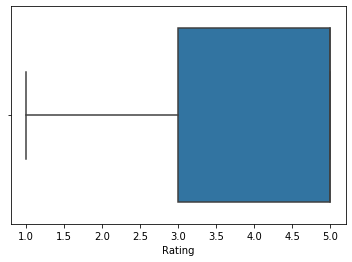

In [13]:
sns.boxplot(EleRating['Rating'])
#As it is categorical variable no outliers are present and most of the data is spread across the ratings-3-5

In [14]:
# Analyzing number of unique userId and productId in the data
print('Unique users in the dataset = ', EleRating['userId'].nunique())
print('Unique products in dataset = ', EleRating['productId'].nunique())

Unique users in the dataset =  4201696
Unique products in dataset =  476002


In [15]:
#Looking for users who has given more than 50 ratings
Users_most_rated = EleRating.groupby('userId').size().sort_values(ascending=False)[:1500]
Users_most_rated

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
AA8RBTN3J2F5H      50
A3KTWUXXB8KKC7     50
A1IU4UAV9QIJAI     50
A3SP7T2PZ3HSDE     50
A17RFKCYS69M3Y     50
Length: 1500, dtype: int64

In [16]:
#Take a subset of the dataset to make it less sparse/ denser. 
#( For example, keep the users only who has given 50 or more number of ratings )
#Filtering the users who has given >50 ratings
counts = EleRating['userId'].value_counts()
df_final = EleRating[EleRating['userId'].isin(counts[counts >= 50].index)]
#df_final has users who have rated 50 or more items

In [17]:
df_final

,userId,productId,Rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0


In [18]:
print('Total users who have rated 50 or more items =', len(df_final))
print('Unique users in final data = ', df_final['userId'].nunique())
print('Unique prodcuts in final data = ', df_final['productId'].nunique())

Total users who have rated 50 or more items = 125871
Unique users in final data =  1540
Unique prodcuts in final data =  48190


In [19]:
#Calculate the density of the rating matrix
final_ratings_matrix = df_final.pivot(index = 'userId', columns ='productId', values = 'Rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

#Inference: Current density of the data set is 17% of original data set

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


In [20]:
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#from surprise.model_selection import train_test_split
from sklearn.model_selection import train_test_split
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(df_final, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,Rating
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
4738241,AB094YABX21WQ,B0056XCEAA,1.0
4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [23]:
train_data.shape,test_data.shape

((88109, 3), (37762, 3))

In [24]:
#Applying popularity based recommendation using productID and Ratings provided
train_data_grouped = train_data.groupby('productId').agg({'Rating': 'mean'}).reset_index()
train_data_grouped.rename(columns = {'Rating': 'score'},inplace=True)
train_data_grouped.head()


,productId,score
0,0594451647,5.0
1,0594481813,3.0
2,0970407998,1.0
3,0972683275,5.0
4,1400501466,4.5


In [25]:
#Sort the products on recommendation ratings score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,score,Rank
0,0594451647,5.0,1.0
3,0972683275,5.0,2.0
6,1400532620,5.0,3.0
9,1400698987,5.0,4.0
10,1685560148,5.0,5.0


In [26]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [27]:
find_recom = [1150,250,350]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 1150

    userId   productId  score  Rank
0     1150  0594451647    5.0   1.0
3     1150  0972683275    5.0   2.0
6     1150  1400532620    5.0   3.0
9     1150  1400698987    5.0   4.0
10    1150  1685560148    5.0   5.0


Here is the recommendation for the userId: 250

    userId   productId  score  Rank
0      250  0594451647    5.0   1.0
3      250  0972683275    5.0   2.0
6      250  1400532620    5.0   3.0
9      250  1400698987    5.0   4.0
10     250  1685560148    5.0   5.0


Here is the recommendation for the userId: 350

    userId   productId  score  Rank
0      350  0594451647    5.0   1.0
3      350  0972683275    5.0   2.0
6      350  1400532620    5.0   3.0
9      350  1400698987    5.0   4.0
10     350  1685560148    5.0   5.0




/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/chai3/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [28]:
#Inference: As noted above, recommendations remain same across the users in case of Popularity based recommendations.
#In other terms, it is not personalized recomendations

In [34]:
#Proceeding with collaborative recommendation system

In [35]:
#Importing surprise libraries
import matplotlib.pyplot as plt
from surprise import KNNWithMeans
from surprise import Dataset
#from surprise import evaluate, print_perf
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise.model_selection import cross_validate

In [36]:
reader = Reader()
data = Dataset.load_from_df(df_final[['userId','productId','Rating']], reader)
trainset, testset = train_test_split(data, test_size=.30)


In [37]:
#Applying SVD

In [47]:
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
test = pd.DataFrame(predictions)
test = test.rename(columns={'uid':'userId', 'iid': 'productId', 
                            'r_ui':'actual', 'est':'prediction'})
cf_model = test.pivot_table(index='userId', 
                            columns='productId', values='prediction').fillna(0)

def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

def get_recs(model, k):
    recs = []
    for user in model.index:
        cf_predictions = get_users_predictions(user, k, model)
        recs.append(cf_predictions)
    return recs    

# Top-5 recommendations for each user
k = 5
recs = get_recs(cf_model, k)
preds = pd.DataFrame(index=cf_model.index)
preds[f'Top-{k} Recommendation'] = recs
preds.head()

,Top-5 Recommendation
userId,
A100UD67AHFODS,"[B0082E9K7U, B000U0S304, B008HO9DIG, B00F0DD0I..."
A100WO06OQR8BQ,"[B00006HSYC, B008AL9VXI, B002669XKY, B002VFWY9..."
A105S56ODHGJEK,"[B000QWEN5K, B00829TIA4, B000N99BBC, B002TLTE6..."
A105TOJ6LTVMBG,"[B003NREDC8, B0002VAQR4, B004S4R5CK, B003LPUUD..."
A10AFVU66A79Y1,"[B002HEWA28, B009NHWVIA, B002Y6CJJ8, B000VJWJW..."


In [39]:
# Calculating RMSE on predictions on test set
print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 0.9940


0.9940055334833763

In [40]:
#Applying item-item collaborative filter

In [41]:
#Loading the data
reader = Reader(rating_scale=(1, 5))
reader = Reader()
data = Dataset.load_from_df(df_final[['userId','productId','Rating']], reader)


In [42]:
#Splitting train and test data
trainset, testset = train_test_split(data, test_size=.30)

In [43]:
#Applying item based collaborative filtering
algo = KNNWithMeans(k=25, sim_options={'name': 'pearson_baseline','user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [44]:
predictions = algo.test(testset)
test = pd.DataFrame(predictions)
test = test.rename(columns={'uid':'userId', 'iid': 'productId', 
                            'r_ui':'actual', 'est':'prediction'})
cf_model = test.pivot_table(index='userId', 
                            columns='productId', values='prediction').fillna(0)

def get_users_predictions(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["predicted_rating"]
    recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)    
    recommended_items = recommended_items.head(n)
    return recommended_items.index.tolist()

def get_recs(model, k):
    recs = []
    for user in model.index:
        cf_predictions = get_users_predictions(user, k, model)
        recs.append(cf_predictions)
    return recs    

# Top-5 recommendations for each user
k = 5
recs = get_recs(cf_model, k)
preds = pd.DataFrame(index=cf_model.index)
preds[f'Top-{k} Recommendation'] = recs
preds.head()

,Top-5 Recommendation
userId,
A100UD67AHFODS,"[B000U0S304, B0082E9K7U, B00HHRP11C, B004R6J2K..."
A100WO06OQR8BQ,"[B00030DEQE, B000PGDT8O, B00016V3VI, B00006HSY..."
A105S56ODHGJEK,"[B002TLTE6Y, B000QWEN5K, B000N99BBC, B001NTFAT..."
A105TOJ6LTVMBG,"[B005J4C820, B000R0FG5W, B0000990ZZ, B003LPUUD..."
A10AFVU66A79Y1,"[B002HEWA28, B001JIBOLQ, B00AAVF14E, B003JZU8D..."


In [45]:
# Calculating RMSE on predictions on test set
print("Item-based Model : Test Set")
accuracy.rmse(predictions, verbose=True)

Item-based Model : Test Set
RMSE: 1.1377


1.1376880468670916

In [ ]:
#Inference:
#In this assignment, 3 recommendation models are applied-Popularity based, SVD and Item-Item based.
#Popularity based recemmendations were non-personalized as we could witness that for different users, same poducts were recommended.
#SVD and Item-Item based models were able to provide personalized recommendations for given user.
#Overall SVD seems to be better recommender for given data set as RMSE is less when compared with Item-Item based recommender